<a href="https://colab.research.google.com/github/Omorusi/DecisionsTress/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Load libraries

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# dataset

data = pd.read_csv('All_Diets.csv')
print(data['Cuisine_type'])

0               american
1       south east asian
2               american
3                mexican
4                chinese
              ...       
7801             italian
7802            american
7803               world
7804            american
7805            american
Name: Cuisine_type, Length: 7806, dtype: object


In [4]:
# Inspect the dataset

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB
None
        Protein(g)     Carbs(g)       Fat(g)
count  7806.000000  7806.000000  7806.000000
mean     83.231498   152.123189   117.328542
std      89.797282   185.907322   122.098117
min       0.000000     0.060000     0.000000
25%      24.415000    36.162500    41.067500
50%      56.280000    93.415000    84.865000
75%     112.357500   205.915000   158.290000
max    1273.610

In [5]:
data

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


In [13]:
data

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time,CuisineType,Recipe,Cuisine
0,paleo,Bone Broth From 'Nom Nom Paleo',0,5.22,1.29,3.20,2022-10-16,17:20:09,0,509,0
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",17,181.55,28.62,146.14,2022-10-16,17:20:09,17,4558,17
2,paleo,Paleo Pumpkin Pie,0,30.91,302.59,96.76,2022-10-16,17:20:09,0,4731,0
3,paleo,Strawberry Guacamole recipes,13,9.62,75.78,59.89,2022-10-16,17:20:09,13,5965,13
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",5,39.84,54.08,71.55,2022-10-16,17:20:09,5,194,5
...,...,...,...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,9,85.20,288.14,137.15,2022-10-16,20:40:44,9,577,9
7802,dash,Make-Your-Own-Salad,0,141.98,123.18,323.50,2022-10-16,20:40:44,0,3321,0
7803,dash,Luis Buñuel Dry Martini,18,0.01,0.39,0.00,2022-10-16,20:40:44,18,3295,18
7804,dash,Cornflake Semi-Fried Chicken Tenders,0,155.38,239.88,260.84,2022-10-16,20:40:44,0,1095,0


In [ ]:
# Display all unique diet types in the dataset
unique_diets = data['Cuisine_type'].unique()
unique_diets


array([ 0, 17, 13,  5, 12,  9,  7,  8, 15,  6,  4, 11,  2,  3, 16, 14,  1,
       10, 18])

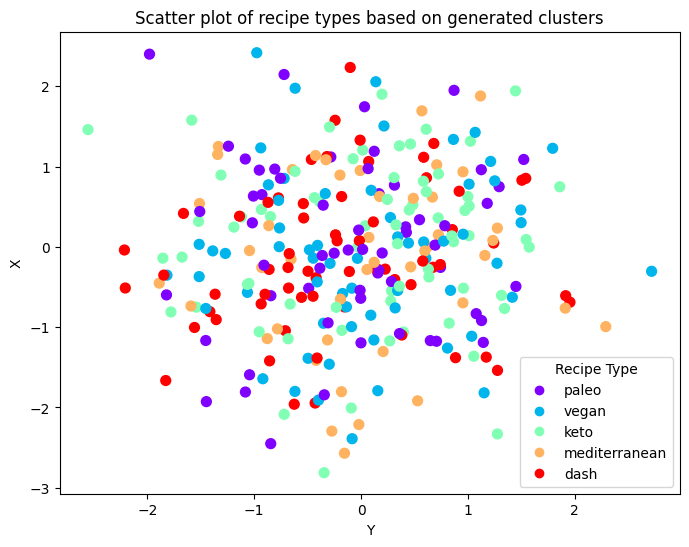

In [30]:


X = np.random.randn(300, 2)  # Example: Replace this with your actual feature data
y = np.random.choice([0, 1, 2, 3, 4], size=300)  # Example: Replace this with your actual recipe type labels

# Map the integer labels to actual recipe types
recipe_types = ['paleo', 'vegan', 'keto', 'mediterranean', 'dash']
y_recipe = np.array([recipe_types[label] for label in y])

# Create a scatter plot with recipe types as colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Add a legend with recipe type labels
recipe_type_labels = {i: recipe_types[i] for i in range(len(recipe_types))}
handles, labels = scatter.legend_elements()
plt.legend(handles, [recipe_type_labels[i] for i in range(len(recipe_types))], title="Recipe Type")

plt.title("Scatter plot of recipe types based on generated clusters")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()


In [32]:

# Drop irrelevant columns from the dataset
cleaned_data = data.drop(columns=[ 'Extraction_day', 'Extraction_time'])

# Display the cleaned dataset
cleaned_data.head(), cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Diet_type     7806 non-null   object 
 1   Recipe_name   7806 non-null   object 
 2   Cuisine_type  7806 non-null   object 
 3   Protein(g)    7806 non-null   float64
 4   Carbs(g)      7806 non-null   float64
 5   Fat(g)        7806 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.0+ KB


(  Diet_type                                        Recipe_name  \
 0     paleo                    Bone Broth From 'Nom Nom Paleo'   
 1     paleo  Paleo Effect Asian-Glazed Pork Sides, A Sweet ...   
 2     paleo                                  Paleo Pumpkin Pie   
 3     paleo                       Strawberry Guacamole recipes   
 4     paleo  Asian Cauliflower Fried "Rice" From 'Nom Nom P...   
 
        Cuisine_type  Protein(g)  Carbs(g)  Fat(g)  
 0          american        5.22      1.29    3.20  
 1  south east asian      181.55     28.62  146.14  
 2          american       30.91    302.59   96.76  
 3           mexican        9.62     75.78   59.89  
 4           chinese       39.84     54.08   71.55  ,
 None)